This notebook shows how to approach any machine learning problem. As this is a simple Linear Regression problem and where everyone starts. I just wanted to show the kind of workflow when trying to solve machine learning problems. 

Import required libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

load the data

In [28]:
data = pd.read_csv('Linear Regression - Sheet1.csv')

Explore the data

In [29]:
data.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


Visualize Data

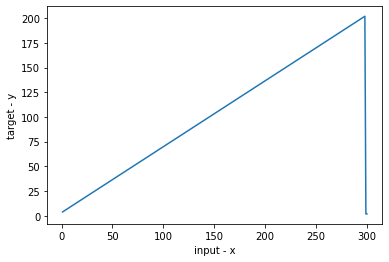

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(data['X'], data['Y'])
ax.set_xlabel('input - x')
ax.set_ylabel('target - y')
plt.show()

The end of the line is not obeying y=mx+c

In [31]:
data.tail()

,X,Y
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889
299,300,1.888889


Ignoring the last two values, as they seem to not lie on the line and may effect the performance of the model. 

In [32]:
data = data.iloc[:298]

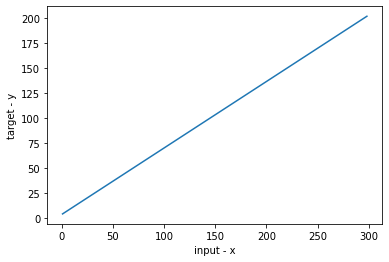

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(data['X'], data['Y'])
ax.set_xlabel('input - x')
ax.set_ylabel('target - y')
plt.show()

In [34]:

X = data['X'].to_numpy().reshape(-1, 1)
y = data['Y'].to_numpy()


Splitting the data into training and testing set

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.3, random_state = 2)

Initializing the model

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Evaluating the performance of model using cross validation

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv= 5)
print(scores)

[1. 1. 1. 1. 1.]


Fitting the model on training data

In [23]:
model.fit(X_train, y_train)

LinearRegression()

Making predictions on test data

In [24]:
y_pred = model.predict(X_test)

Evaluate the predictions by using different metrics. 

Mean squared error or R2 score can be used as metrics for Regression analysis.

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  3.9695504240819695e-16
R2 Score:  1.0


Getting model attributes. In this case the slope and intercept.

In [26]:
print('Slope :', model.coef_)
print('Intercept :',model.intercept_)

print('The line is of the form "y = ({:.3f}) * x + {:.3f}"'.format(model.coef_[0], model.intercept_))

Slope : [0.66666667]
Intercept : 3.222222220673828
The line is of the form "y = (0.667) * x + 3.222"


The Mean square error should be as close to zero as possible and the R2 Score should be as close as to 1 as possible. Since this is a simple task, the results are extremely satisfying. But in most cases it takes time and effort to figure the right hyper-parameters which give the best performance.